In [17]:
import torchvision
import torch.nn as nn
from torchvision.utils import save_image, make_grid
import json
import os
import torch
import matplotlib.pyplot as plt
import numpy as np

In [3]:

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True)
                                

0.00B [00:00, ?B/s]

171MB [00:05, 29.5MB/s]                            


Files already downloaded and verified


In [69]:
# JSON file
with open ('../outputs/IFResNet_test_id_0_epoch_0.json', "r") as f:
     data = json.loads(f.read())


In [70]:
labels = np.array([i[1] for i in trainset])

In [77]:
data['influence']

[0.3453105390071869,
 0.21500566601753235,
 0.1606268733739853,
 0.33032819628715515,
 0.5600854158401489,
 0.6384719610214233,
 0.28415223956108093,
 0.2242395132780075,
 0.35100221633911133,
 0.29178065061569214,
 0.22601154446601868,
 0.2238726168870926,
 0.21057945489883423,
 0.375262975692749,
 0.16984812915325165,
 0.1411958485841751,
 0.17238153517246246,
 0.26449108123779297,
 0.3145033121109009,
 0.25588834285736084,
 0.3956359922885895,
 0.36912772059440613,
 0.32347026467323303,
 0.26281052827835083,
 0.3044371008872986,
 0.269110769033432,
 0.26545149087905884,
 0.4467011094093323,
 0.30916276574134827,
 0.653397262096405,
 0.3392570912837982,
 0.14727763831615448,
 0.6498813629150391,
 0.2804996371269226,
 0.2852118909358978,
 0.4721400737762451,
 0.2456268072128296,
 0.22056348621845245,
 0.2955281734466553,
 0.27438029646873474,
 0.4182955026626587,
 0.3831799030303955,
 0.2755422592163086,
 0.23862454295158386,
 0.554563045501709,
 0.6568016409873962,
 0.702349007129669

In [71]:
labels[data['helpful']]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,

In [72]:
labels[data['harmful']]

array([4, 9, 9, 9, 4, 4, 4, 9, 4, 9, 9, 4, 9, 9, 9, 4, 4, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 4, 4, 4, 4, 9, 9, 4, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 4, 9, 9, 4, 9, 9, 4, 9, 4, 9, 9, 9, 9, 9, 9, 9, 4, 9, 9, 9, 4,
       4, 9, 9, 9, 9, 9, 4, 9, 9, 9, 4, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 4, 9, 9, 9, 9, 9, 9, 9, 9, 9, 4, 4, 9, 4, 9, 9, 9,
       4, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 4, 4, 9, 9, 4, 9, 9, 9, 9, 9, 9,
       4, 9, 9, 4, 9, 9, 9, 4, 9, 4, 9, 4, 8, 9, 9, 9, 9, 9, 9, 4, 9, 9,
       9, 4, 9, 9, 9, 9, 9, 4, 9, 4, 9, 9, 9, 9, 9, 4, 9, 4, 9, 9, 9, 4,
       9, 9, 9, 4, 9, 9, 9, 9, 9, 9, 4, 9, 9, 8, 9, 9, 9, 4, 9, 9, 9, 4,
       9, 9, 9, 9, 4, 9, 9, 9, 9, 4, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 4, 9, 9, 9, 9, 9, 9, 9, 9, 9, 4, 9, 9, 9, 9, 9,
       9, 9, 9, 4, 9, 9, 9, 9, 9, 9, 4, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 4, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 4, 9, 4, 9, 4, 4, 9, 4, 9,

In [73]:
arr = np.argsort(data['influence'])
rank = [[] for _ in range(10)]
for i in range(5000):
    rank[labels[arr[i]]].append(i)


In [74]:
sorted(rank[2])

[4066]

In [75]:
np.array(data['influence'])[np.argsort(data['influence'])]

array([0.09417875, 0.1074544 , 0.10746364, ..., 0.82431811, 0.83122832,
       0.86497176])

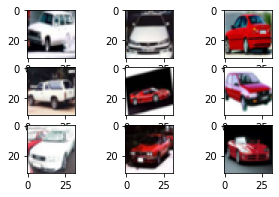

In [76]:
fig = plt.figure(figsize=(5, 3))
for i in range(1,10):
    fig.add_subplot(3,3,i)
    plt.imshow(trainset[data['helpful'][i]][0])

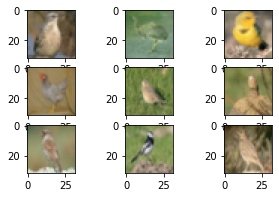

In [12]:
fig = plt.figure(figsize=(5, 3))
for i in range(1,10):
    fig.add_subplot(3,3,i)
    plt.imshow(trainset[data['harmful'][i]][0])

/home/xiaochen/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:682: FutureWarning: The input object of type 'Image' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Image', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  x = np.array(x, subok=True, copy=copy)
/home/xiaochen/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:682: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.array(x, subok=True, copy=copy)


TypeError: Image data of dtype object cannot be converted to float

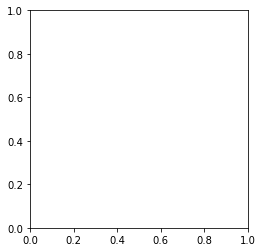

In [14]:
plt.imshow([trainset[data['helpful'][10]][0],trainset[data['helpful'][13]][0]])

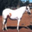

In [36]:
trainset[data['harmful'][15]][0]